# Analysis of Horse Race Probability Game

### Game Explaination
This game consists of 11 columns, representing numbers [2, 12], each with a specific number of pegging holes. The game is played by rolling a pair of dice and moving the corresponding horse one peg forward. The winner is the horse which crosses the finish line first. The number of holes in each column are (column, holes) [(2, 3), (3, 6), (4, 8), (5, 11), (6, 14), (7, 17), (8, 14), (9, 11), (10, 8), (11, 6), (12, 3)]

### Variation
These is a variant of the game where before the game begins, n (0, 11] numbers are rolled, and those numbers are eliminated from contention.

In [1]:
import numpy as np
import random
import seaborn as sn
import pandas as pd

In [ ]:
BOARD = [3, 6, 8, 11, 14, 17, 14, 11, 8, 6, 3]
NUM_ELIM = 0

## Game Setup

In [ ]:
def game(board, num_elim):
    # Defines game play for horse game
    # Returns winner, dictionary of roll counts, and eliminated numbers
    # PARAMS:
    #   board: number of pegging holes for each column
    #   n: number of columns to be eliminated before rolling begins
    def check_winner(rolls, board, elim):
        for i, value in enumerate(rolls):
            if (value >= board[i] and (i + 2) not in elim):
                return i + 2
        return 0
    
    elim = set() #initialize with false value to avoid empty set
    while len(elim) < num_elim:
        temp = random.randint(1, 6) + random.randint(1, 6)
        if temp not in elim:
            elim.add(temp)

    rolls = np.zeros(11)
    winner = 0
    while (winner == 0):
        roll = random.randint(1, 6) + random.randint(1, 6)
        rolls[roll - 2] += 1
        winner = check_winner(rolls, board, elim)
    
    return winner, rolls, elim

## Analysis of Dice Rolls

In this section I will test the distribution of dice rolls from the random.randint function to ensure balanced distribution for one and two dice

In [52]:
N = 1000000
one_die = np.zeros(7)
two_dice = np.zeros(13)

for i in range(N):
    d1 = random.randint(1, 6)
    d2 = random.randint(1, 6)
    one_die[d1] += 1
    two_dice[d1 + d2] += 1

<Axes: >

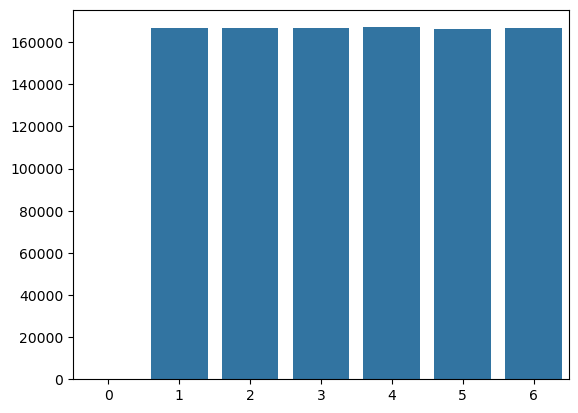

In [53]:
sn.barplot(one_die)

<Axes: >

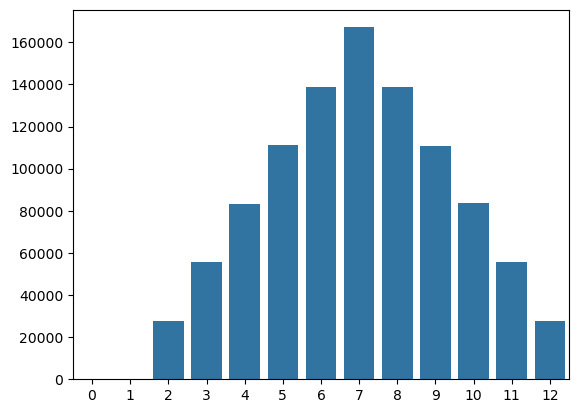

In [54]:
sn.barplot(two_dice)

Comparing realized probabilities for 2 dice compared to expected probabilities

In [56]:
exp_prob = [1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36]
real_prob = np.zeros(11)
for i, val in enumerate(two_dice):
    if (i < 2):
        continue
    real_prob[i - 2] = val / N

In [62]:
print("NUM:\tEXP_PROB\tREAL_PROB")
for i in range(11):
    print(f"{i+2}\t{round(exp_prob[i],3)}\t\t{round(real_prob[i],3)}")

NUM:	EXP_PROB	REAL_PROB
2	0.028		0.028
3	0.056		0.056
4	0.083		0.083
5	0.111		0.111
6	0.139		0.139
7	0.167		0.167
8	0.139		0.139
9	0.111		0.111
10	0.083		0.083
11	0.056		0.056
12	0.028		0.028


The dice rolls from this simulated roll match the proper distribution

## Game Simulation with 0 eliminations

In [71]:
N = 100000
BOARD = [3, 6, 8, 11, 14, 17, 14, 11, 8, 6, 3]
NUM_ELIM = 0

winner_sum = np.zeros(11)
rolls_sum = np.zeros(11)

for i in range(N):
    winner, rolls, elim = game(BOARD, NUM_ELIM)
    winner_sum[winner-2] += 1
    rolls_sum += rolls

<Axes: >

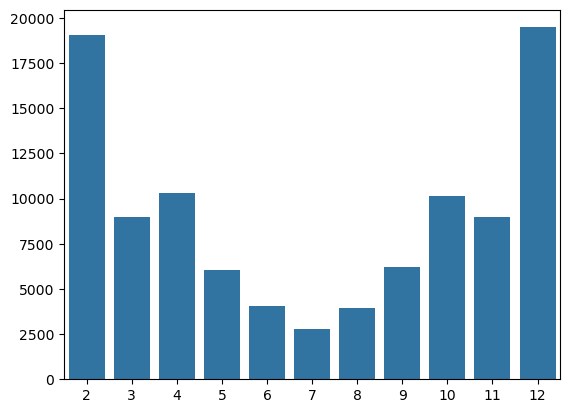

In [75]:
sn.barplot(x = range(2, 13), y = winner_sum)


In [76]:
N = 100000
BOARD = [3, 6, 8, 11, 14, 17, 14, 11, 8, 6, 3]
NUM_ELIM = 1

winner_sum = np.zeros(11)
rolls_sum = np.zeros(11)
elim_sum = np.zeros(11)

for i in range(N):
    winner, rolls, elim = game(BOARD, NUM_ELIM)
    winner_sum[winner-2] += 1
    rolls_sum += rolls
    for val in elim:
        elim_sum[val - 2] += 1

<Axes: >

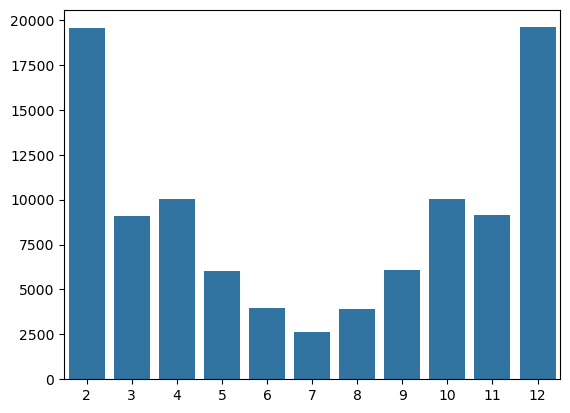

In [77]:
sn.barplot(x = range(2, 13), y = winner_sum)

<Axes: >

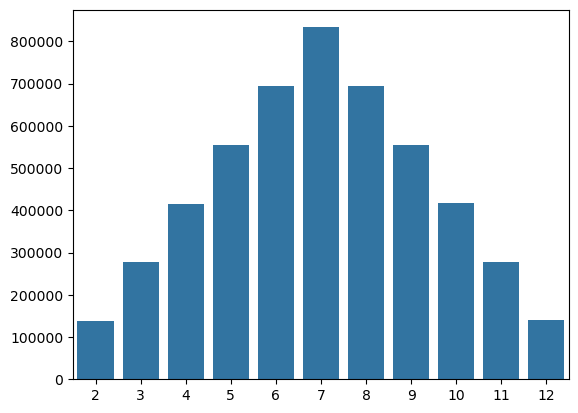

In [78]:
sn.barplot(x = range(2, 13), y = rolls_sum)


<Axes: >

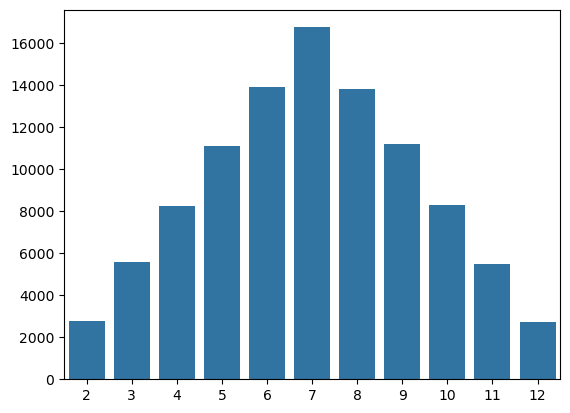

In [79]:
sn.barplot(x = range(2, 13), y = elim_sum)
